In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io
from glob import glob
from os import listdir

In [2]:
## arr=[top,bottom,left,right]

    
def MarkObject(img):
    
    visited=np.zeros((img.shape[0],img.shape[1]))
    
    def dfs(img,coordinates,i,j):
        if i<0 or i>=img.shape[0] or j<0 or j>=img.shape[1] or img[i][j]==0 or visited[i][j]==1:
            return
            
        visited[i][j]=1;
        if i<coordinates[0]:
            coordinates[0]=i;
        if i>coordinates[1]:
            coordinates[1]=i;
        if j<coordinates[2]:
            coordinates[2]=j;
        if j>coordinates[3]:
            coordinates[3]=j;
        
        dfs(img,coordinates,i+1,j);
        dfs(img,coordinates,i,j+1);
        dfs(img,coordinates,i-1,j);
        dfs(img,coordinates,i,j-1);

    clist=[]
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            if img[i][j]==0 or visited[i][j]==1:
                continue
            c=[i,i,j,j]
            dfs(img,c,i,j)
            if c[0]!=c[1] and c[2]!=c[3]:
                clist.append(c)
    return clist

In [3]:
def GetCoordinates(img,istart,iend,jstart,jend):
    
    clist=np.array(MarkObject(img[istart:iend,jstart:jend]))
    ##print(clist)
    if len(clist)>0:
        df=pd.DataFrame({'top':clist[:,0]+istart,'bottom':clist[:,1]+istart,'left':clist[:,2]+jstart,'right':clist[:,3]+jstart})
        df.to_csv(('coordinates_{}_{}_{}_{}.csv').format(istart,iend,jstart,jend))
        return df
    else:
        return None

In [4]:
folders_composite=glob("Composite Images/*/")
folders_composite

['Composite Images\\20190508-C2GNT1-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-05-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-05-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-GALNT

In [5]:
labels=pd.read_csv('labels.csv',index_col=0)
labels

,label
0,20190508-C2GNT1-EGFP-Noc-01
1,20190508-C2GNT1-EGFP-Noc-02
2,20190508-C2GNT1-EGFP-Noc-03
3,20190508-C2GNT1-EGFP-Noc-04
4,20190508-C2GNT1-EGFP-Noc-05
5,20190508-GALNT4-EGFP-Noc-01
6,20190508-GALNT4-EGFP-Noc-02
7,20190508-GALNT4-EGFP-Noc-03
8,20190508-GALNT4-EGFP-Noc-04
9,20190508-GALNT4-EGFP-Noc-05


In [8]:
for i in range(0,40):
    img_file_path=folders_composite[i]+"all_object.tif"
    img_obj=io.imread(img_file_path)
    
    old_roi_co_file_path=folders_composite[i]+"\\{}-ROI Coordinates - old.csv".format(labels.iloc[i].values[0])

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])

    roi_coordinates=pd.read_csv(old_roi_co_file_path,index_col=0)

    new_golgy_co=pd.DataFrame(columns=['top','bottom','left','right'])

    for index,row in roi_coordinates.iterrows():
        new_row=GetCoordinates(img_obj,row['top'],row['bottom']+1,row['left'],row['right']+1)
        new_golgy_co=new_golgy_co.append(new_row).reset_index(drop=True)
    
    new_golgy_co.to_csv(golgy_co_file_path)

    print('Done with {}'.format(labels.iloc[i].values[0]))

Done with 20190508-C2GNT1-EGFP-Noc-01
Done with 20190508-C2GNT1-EGFP-Noc-02
Done with 20190508-C2GNT1-EGFP-Noc-03
Done with 20190508-C2GNT1-EGFP-Noc-04
Done with 20190508-C2GNT1-EGFP-Noc-05
Done with 20190508-GALNT4-EGFP-Noc-01
Done with 20190508-GALNT4-EGFP-Noc-02
Done with 20190508-GALNT4-EGFP-Noc-03
Done with 20190508-GALNT4-EGFP-Noc-04
Done with 20190508-GALNT4-EGFP-Noc-05
Done with 20190508-GALNT8-EGFP-Noc-01
Done with 20190508-GALNT8-EGFP-Noc-02
Done with 20190508-GALNT8-EGFP-Noc-03
Done with 20190508-GALNT8-EGFP-Noc-04
Done with 20190508-GALNT8-EGFP-Noc-05
Done with 20190508-GALNT8-EGFP-Noc-06
Done with 20190508-GALNT8-EGFP-Noc-07
Done with 20190508-GALNT8-EGFP-Noc-08
Done with 20190508-tetraspeckbeads-aft-01
Done with 20190508-tetraspeckbeads-bef-01
Done with 20190508-VIP36-EGFP-Noc-01
Done with 20190508-VIP36-EGFP-Noc-02
Done with 20190508-VIP36-EGFP-Noc-03
Done with 20190508-VIP36-EGFP-Noc-04
Done with 20190508-VIP36-EGFP-Noc-05
Done with 20190508-VIP36-EGFP-Noc-06
Done with 

In [9]:
new_golgy_co

,top,bottom,left,right
0,1,8,968,976
1,3,10,621,630
2,9,16,39,48
3,10,17,1068,1074
4,16,22,221,228
...,...,...,...,...
528,1054,1058,410,415
529,1052,1058,1203,1209
530,1059,1067,720,729
531,1063,1071,1260,1269


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


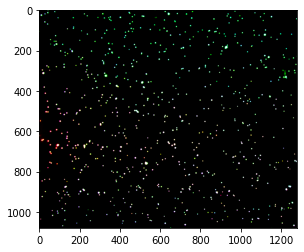

In [15]:
img_test=io.imread("{}composite_{}.tif".format(folders_composite[i],labels.iloc[i].values[0]))
plt.imshow(img_test)

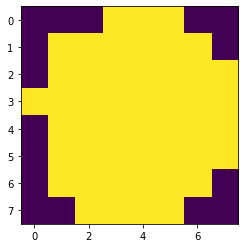

In [11]:
plt.imshow(img_obj[1:9,968:976])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


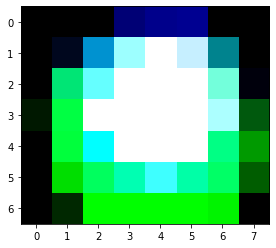

In [16]:
plt.imshow(img_test[1:8,968:976])

In [22]:
new_golgy_co

,top,bottom,left,right
0,1,8,968,976
1,3,10,621,630
2,9,16,39,48
3,10,17,1068,1074
4,16,22,221,228
...,...,...,...,...
528,1054,1058,410,415
529,1052,1058,1203,1209
530,1059,1067,720,729
531,1063,1071,1260,1269


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


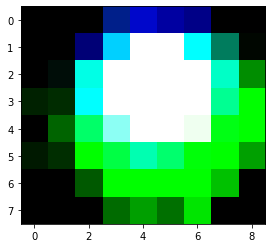

In [28]:
plt.imshow(img_test[3:11,621:630])

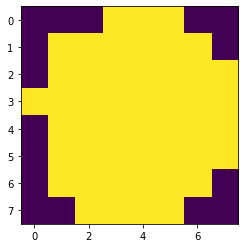

In [35]:
plt.imshow(img_obj[1:9,968:976])

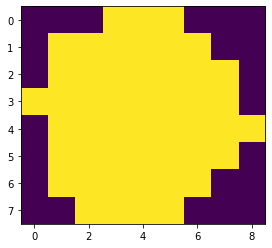

In [34]:
plt.imshow(img_obj[1:9,968:977])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


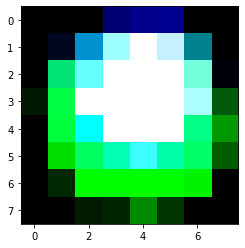

In [30]:
plt.imshow(img_test[1:9,968:976])